# Meteo: Shot-wave incoming radiation (SW_IN) (2006-2024)

**Author**: Lukas Hörtnagl (holukas@ethz.ch)

# Variable

In [1]:
varname = 'SW_IN_T1_47_1'
var = "SW_IN"  # Name shown in plots
units = r"($\mathrm{W\ m^{-2}}$)"

# Imports

In [2]:
import importlib.metadata
import warnings
from datetime import datetime
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import diive as dv
from diive.core.io.files import save_parquet, load_parquet
from diive.core.plotting.cumulative import CumulativeYear
from diive.core.plotting.bar import LongtermAnomaliesYear

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.87.1


# Load data

In [3]:
SOURCEDIR = r"../10_METEO"
FILENAME = r"12.3_METEO_GAPFILLED_2004-2024.parquet"
FILEPATH = Path(SOURCEDIR) / FILENAME
df = load_parquet(filepath=FILEPATH)
keeplocs = (df.index.year >= 2006) & (df.index.year <= 2024)
df = df[keeplocs].copy()
df

Loaded .parquet file ..\10_METEO\12.3_METEO_GAPFILLED_2004-2024.parquet (0.060 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


,LW_IN_T1_47_1,PA_T1_47_1,PPFD_IN_T1_47_1,RH_T1_47_1,SW_IN_T1_47_1,TA_T1_47_1,SW_IN_T1_47_1_gfXG,TA_T1_47_1_gfXG,PPFD_IN_T1_47_1_gfXG
TIMESTAMP_MIDDLE,,,,,,,,,
2006-01-01 00:15:00,330.969940,92.024002,0.0,98.403702,0.0,1.209000,0.0,1.209000,0.0
2006-01-01 00:45:00,330.439697,91.990997,0.0,98.403702,0.0,1.007000,0.0,1.007000,0.0
2006-01-01 01:15:00,NaN,91.971001,0.0,98.303704,0.0,1.097000,0.0,1.097000,0.0
2006-01-01 01:45:00,331.401764,91.951004,0.0,98.403702,0.0,1.297000,0.0,1.297000,0.0
2006-01-01 02:15:00,331.160370,91.934006,0.0,98.403702,0.0,1.331000,0.0,1.331000,0.0
...,...,...,...,...,...,...,...,...,...
2024-12-31 21:45:00,232.595527,94.211806,0.0,87.254008,0.0,-0.504794,0.0,-0.504794,0.0
2024-12-31 22:15:00,232.609777,94.189013,0.0,87.430236,0.0,-0.296828,0.0,-0.296828,0.0
2024-12-31 22:45:00,232.345020,94.169525,0.0,89.787920,0.0,-0.392922,0.0,-0.392922,0.0


In [4]:
series = df[varname].copy()
series

TIMESTAMP_MIDDLE
2006-01-01 00:15:00    0.0
2006-01-01 00:45:00    0.0
2006-01-01 01:15:00    0.0
2006-01-01 01:45:00    0.0
2006-01-01 02:15:00    0.0
                      ... 
2024-12-31 21:45:00    0.0
2024-12-31 22:15:00    0.0
2024-12-31 22:45:00    0.0
2024-12-31 23:15:00    0.0
2024-12-31 23:45:00    0.0
Freq: 30min, Name: SW_IN_T1_47_1, Length: 333120, dtype: float64

In [5]:
xlabel = f"{var} ({units})"
xlim = [series.min(), series.max()]

</br>

# Stats

## Overall mean

In [6]:
_yearly_avg = series.resample('YE').mean()
_overall_mean = _yearly_avg.mean()
_overall_sd = _yearly_avg.std()
print(f"Overall mean: {_overall_mean} +/- {_overall_sd}")

Overall mean: 144.96503741344142 +/- 8.608602956557682


## Yearly means

In [7]:
series.resample('YE').mean()

TIMESTAMP_MIDDLE
2006-12-31    135.939501
2007-12-31    141.805157
2008-12-31    136.728011
2009-12-31    137.843690
2010-12-31    131.191375
2011-12-31    150.020200
2012-12-31    139.144684
2013-12-31    137.017228
2014-12-31    144.983657
2015-12-31    155.818257
2016-12-31    144.510632
2017-12-31    153.484954
2018-12-31    152.331358
2019-12-31    151.435834
2020-12-31    155.872297
2021-12-31    146.824263
2022-12-31    160.850230
2023-12-31    145.794347
2024-12-31    132.740037
Freq: YE-DEC, Name: SW_IN_T1_47_1, dtype: float64

## Monthly averages

In [8]:
seriesdf = pd.DataFrame(series)
seriesdf['MONTH'] = seriesdf.index.month
seriesdf['YEAR'] = seriesdf.index.year
monthly_avg = seriesdf.groupby(['YEAR', 'MONTH'])[varname].mean().unstack()
monthly_avg

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2006,50.899051,58.722736,106.317192,162.769202,189.103795,268.566624,284.475316,146.286217,155.189567,100.150799,64.252037,40.742373
2007,39.825179,77.110025,135.987100,253.702291,212.135527,227.360596,219.522755,182.137087,163.059730,103.842508,51.798866,33.005676
2008,48.027879,106.239409,117.438274,139.057256,241.774568,227.176324,243.220083,203.113396,139.387541,90.250120,53.999669,29.605070
2009,39.537355,76.455523,105.414743,200.706655,229.433903,252.546844,227.345487,196.290979,160.682545,96.251005,48.490726,29.682786
2010,37.227410,67.457293,126.035488,213.073504,161.499327,222.754495,239.540399,176.939965,167.063098,91.224560,48.279606,28.940100
2011,40.045098,76.125026,143.873194,239.485702,269.005390,209.502899,230.267809,236.678244,170.655131,96.865746,56.093205,27.286685
2012,34.772823,97.623528,174.426550,146.489266,243.958609,233.521002,226.440464,212.188406,149.568234,73.956370,42.192407,33.467133
2013,40.008816,60.714161,102.239948,142.963816,183.008096,240.358686,290.239942,232.297106,153.324410,86.207134,44.734129,63.983770
2014,45.105636,81.426023,163.471591,189.202980,217.711388,294.751177,195.611411,193.154618,162.935567,102.434049,61.204169,30.687367


</br>

# Heatmap plots

## Half-hourly

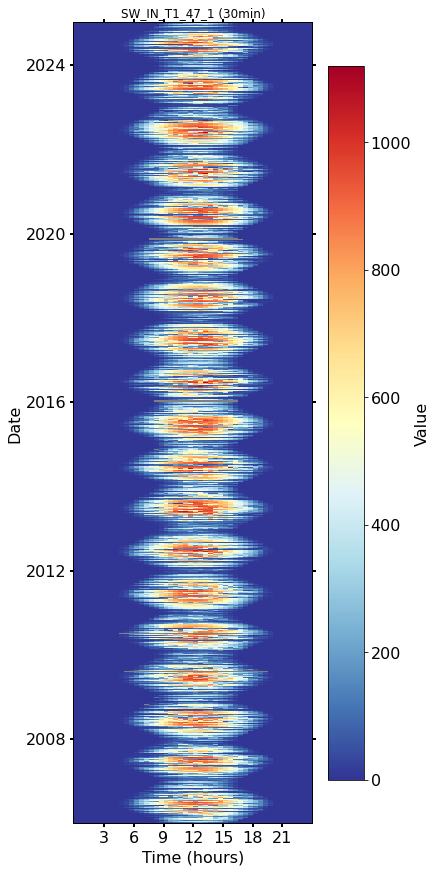

In [9]:
fig, axs = plt.subplots(ncols=1, figsize=(6, 12), dpi=72, layout="constrained")
dv.heatmapdatetime(series=series, ax=axs, cb_digits_after_comma=0).plot()

## Monthly

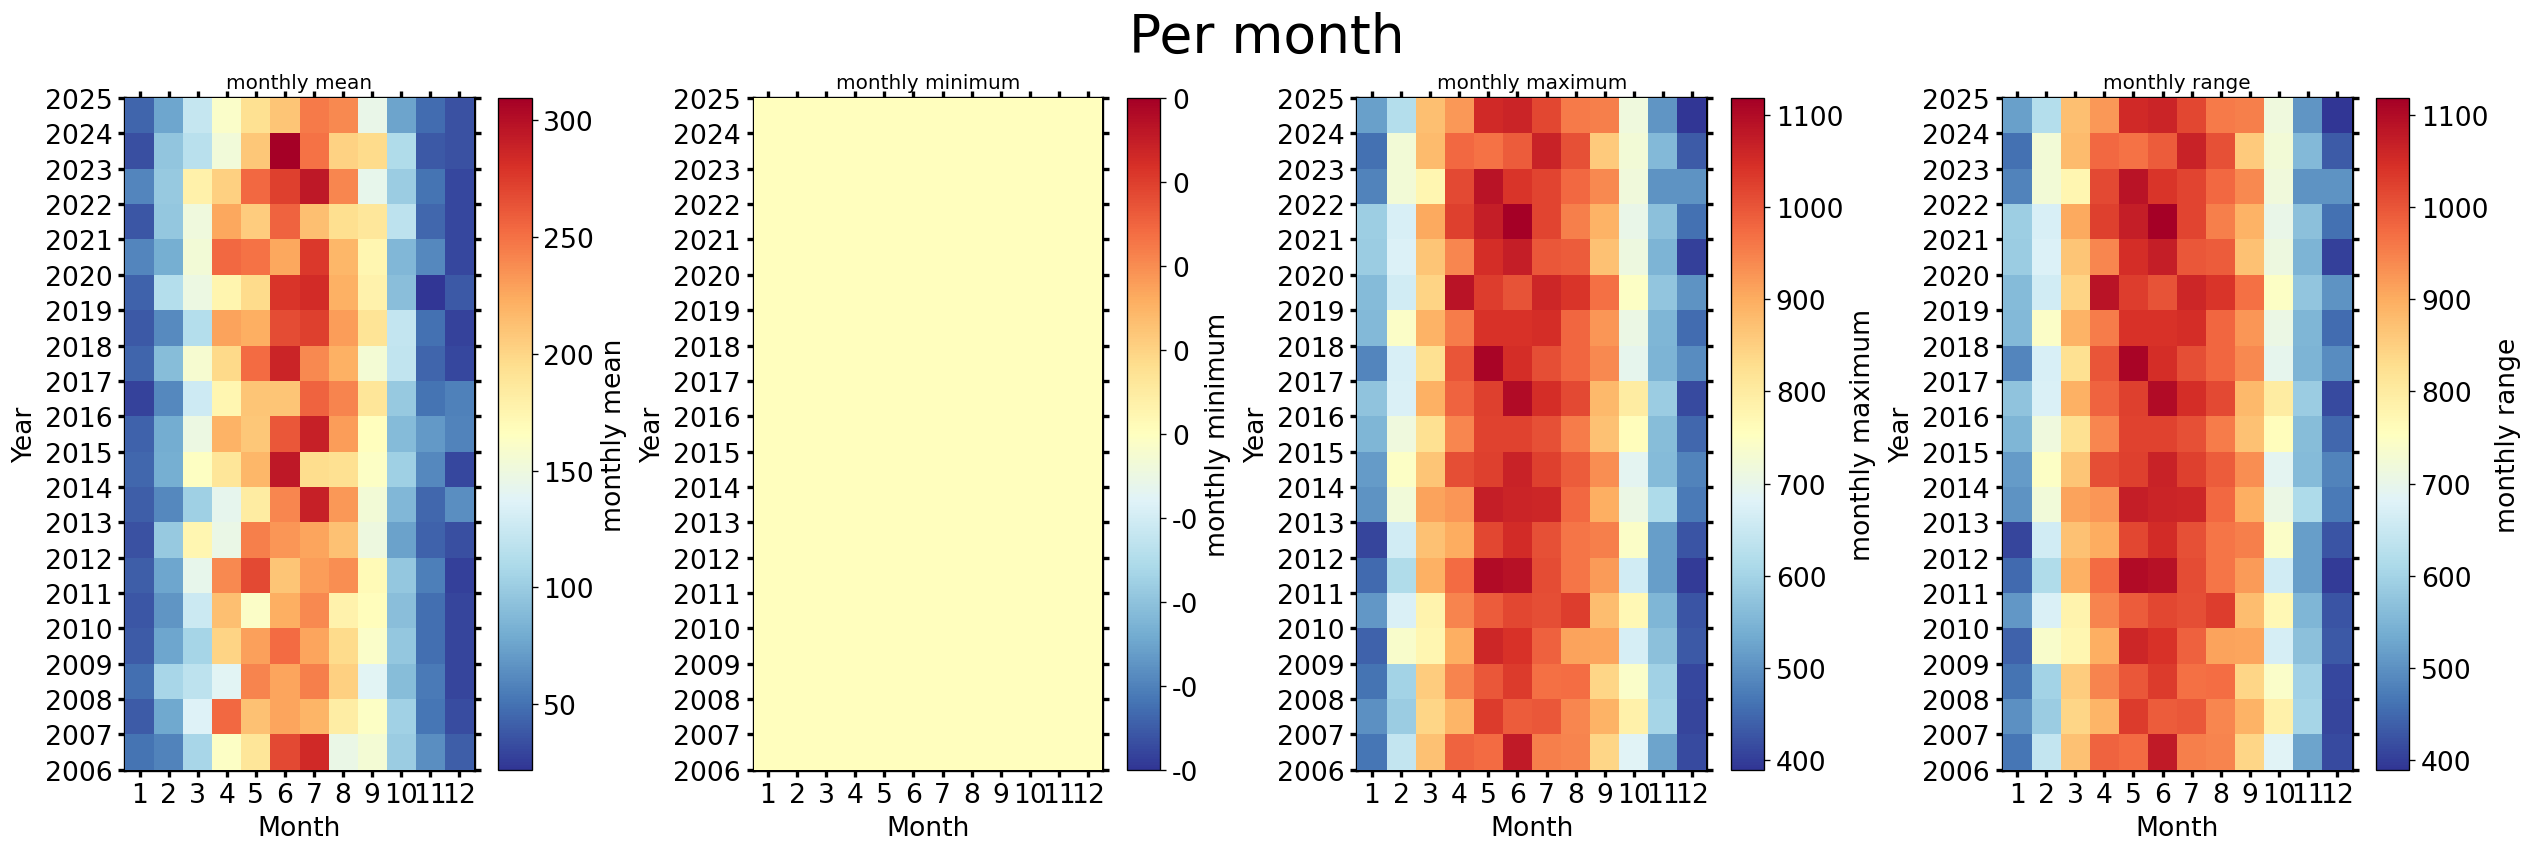

In [10]:
fig, axs = plt.subplots(ncols=4, figsize=(21, 7), dpi=120, layout="constrained")
fig.suptitle(f'Per month', fontsize=32)
dv.heatmapyearmonth(series_monthly=series.resample('M').mean(), title="monthly mean", ax=axs[0], cb_digits_after_comma=0, zlabel="monthly mean").plot()
dv.heatmapyearmonth(series_monthly=series.resample('M').min(), title="monthly minimum", ax=axs[1], cb_digits_after_comma=0, zlabel="monthly minimum").plot()
dv.heatmapyearmonth(series_monthly=series.resample('M').max(), title="monthly maximum", ax=axs[2], cb_digits_after_comma=0, zlabel="monthly maximum").plot()
_range = series.resample('M').max().sub(series.resample('M').min())
dv.heatmapyearmonth(series_monthly=_range, title="monthly range", ax=axs[3], cb_digits_after_comma=0, zlabel="monthly range").plot()

## Monthly ranks

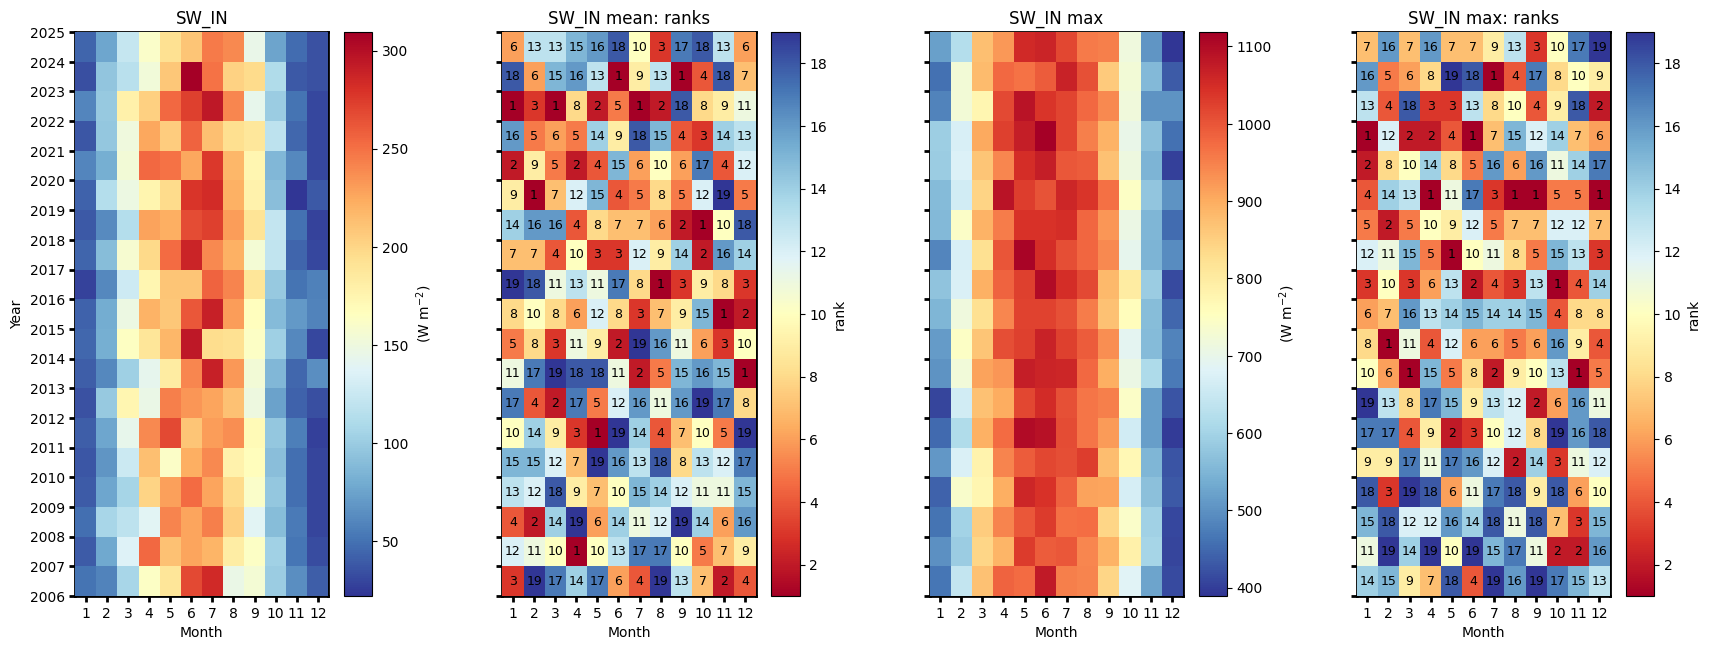

In [11]:
# Figure
fig = plt.figure(facecolor='white', figsize=(17, 6))

# Gridspec for layout
gs = gridspec.GridSpec(1, 4)  # rows, cols
gs.update(wspace=0.35, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax_mean = fig.add_subplot(gs[0, 0])
ax_mean_ranks = fig.add_subplot(gs[0, 1])
ax_max = fig.add_subplot(gs[0, 2])
ax_max_ranks = fig.add_subplot(gs[0, 3])
params = {'axlabels_fontsize': 10, 'ticks_labelsize': 10, 'cb_labelsize': 10}
dv.heatmapyearmonth_ranks(ax=ax_mean, series=series, agg='mean', ranks=False, zlabel=f"{units}", cmap="RdYlBu_r", show_values=False, **params).plot()

hm_mean_ranks = dv.heatmapyearmonth_ranks(ax=ax_mean_ranks, series=series, agg='mean', **params)
hm_mean_ranks.plot()

dv.heatmapyearmonth_ranks(ax=ax_max, series=series, agg='max', ranks=False, zlabel=f"{units}", cmap="RdYlBu_r", show_values=False, **params).plot()
dv.heatmapyearmonth_ranks(ax=ax_max_ranks, series=series, agg='max', **params).plot()

ax_mean.set_title(f"{var}", color='black')
ax_mean_ranks.set_title(f"{var} mean: ranks", color='black')
ax_max.set_title(f"{var} max", color='black')
ax_max_ranks.set_title(f"{var} max: ranks", color='black')

ax_mean.tick_params(left=True, right=False, top=False, bottom=True,
                    labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax_mean_ranks.tick_params(left=True, right=False, top=False, bottom=True,
                   labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_max.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_max_ranks.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)

ax_mean_ranks.set_ylabel("")
ax_max.set_ylabel("")
ax_max_ranks.set_ylabel("")

fig.show()

### Mean ranks per year

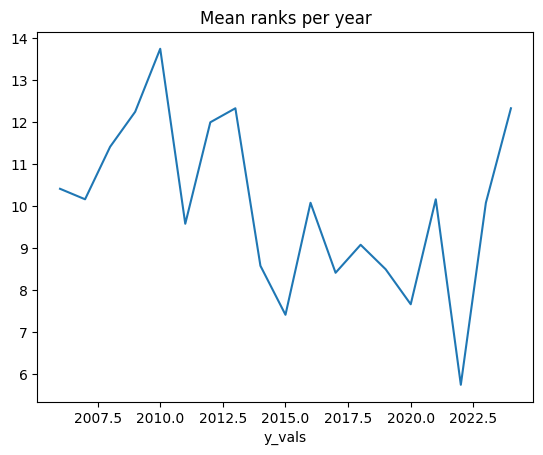

In [12]:
hm_mean_ranks.hm.get_plot_data().mean(axis=1).plot(title="Mean ranks per year");

</br>

# Ridgeline plots

## Yearly

In [ ]:
# rp = dv.ridgeline(series=series)
# rp.plot(
#     how='yearly',
#     kd_kwargs=None,  # params from scikit KernelDensity as dict
#     xlim=xlim,  # min/max as list
#     ylim=[0, 0.01],  # min/max as list
#     hspace=-0.8,  # overlap between months
#     xlabel=f"{var} ({units})",
#     fig_width=5,
#     fig_height=9,
#     shade_percentile=0.5,
#     show_mean_line=False,
#     fig_title=f"{var} per year (2005-2024)",
#     fig_dpi=72,
#     showplot=True,
#     ascending=False
# )

## Monthly

In [ ]:
# rp.plot(
#     how='monthly',
#     kd_kwargs=None,  # params from scikit KernelDensity as dict
#     xlim=xlim,  # min/max as list
#     ylim=[0, 0.01],  # min/max as list
#     hspace=-0.6,  # overlap between months
#     xlabel=f"{var} ({units})",
#     fig_width=4.5,
#     fig_height=8,
#     shade_percentile=0.5,
#     show_mean_line=False,
#     fig_title=f"{var} per month (2005-2024)",
#     fig_dpi=72,
#     showplot=True,
#     ascending=False
# )

## Weekly

In [ ]:
# rp.plot(
#     how='weekly',
#     kd_kwargs=None,  # params from scikit KernelDensity as dict
#     xlim=xlim,  # min/max as list
#     ylim=[0, 0.15],  # min/max as list
#     hspace=-0.6,  # overlap
#     xlabel=f"{var} ({units})",
#     fig_width=6,
#     fig_height=16,
#     shade_percentile=0.5,
#     show_mean_line=False,
#     fig_title=f"{var} per week (2005-2024)",
#     fig_dpi=72,
#     showplot=True,
#     ascending=False
# )

## Single years per month

In [ ]:
# uniq_years = series.index.year.unique()
# for uy in uniq_years:
#     series_yr = series.loc[series.index.year == uy].copy()
#     rp = dv.ridgeline(series=series_yr)
#     rp.plot(
#         how='monthly',
#         kd_kwargs=None,  # params from scikit KernelDensity as dict
#         xlim=xlim,  # min/max as list
#         ylim=[0, 0.18],  # min/max as list
#         hspace=-0.6,  # overlap
#         xlabel=f"{var} ({units})",
#         fig_width=6,
#         fig_height=7,
#         shade_percentile=0.5,
#         show_mean_line=False,
#         fig_title=f"{var} per month ({uy})",
#         fig_dpi=72,
#         showplot=True,
#         ascending=False
#     )

## Single years per week

In [ ]:
# uniq_years = series.index.year.unique()
# for uy in uniq_years:
#     series_yr = series.loc[series.index.year == uy].copy()
#     rp = dv.ridgeline(series=series_yr)
#     rp.plot(
#         how='weekly',
#         kd_kwargs=None,  # params from scikit KernelDensity as dict
#         xlim=xlim,  # min/max as list
#         ylim=[0, 0.3],  # min/max as list
#         hspace=-0.8,  # overlap
#         xlabel=f"{var} ({units})",
#         fig_width=9,
#         fig_height=18,
#         shade_percentile=0.5,
#         show_mean_line=False,
#         fig_title=f"{var} per week ({uy})",
#         fig_dpi=72,
#         showplot=True,
#         ascending=False
#     )

</br>

# Cumulative plot

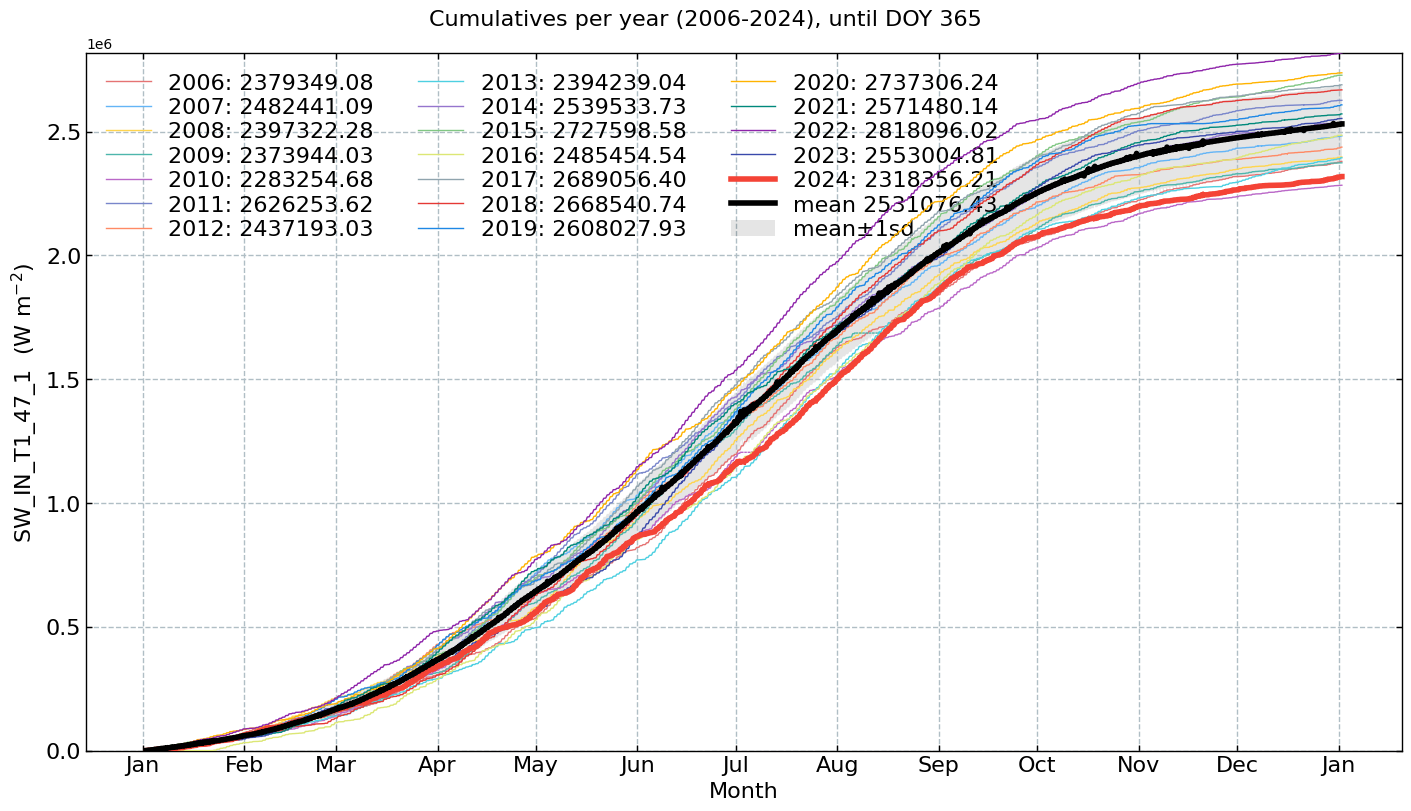

In [13]:
CumulativeYear(
    series=series,
    series_units=units,
    start_year=2005,
    end_year=2024,
    show_reference=True,
    excl_years_from_reference=None,
    highlight_year=2024,
    highlight_year_color='#F44336').plot();

</br>

# Long-term anomalies

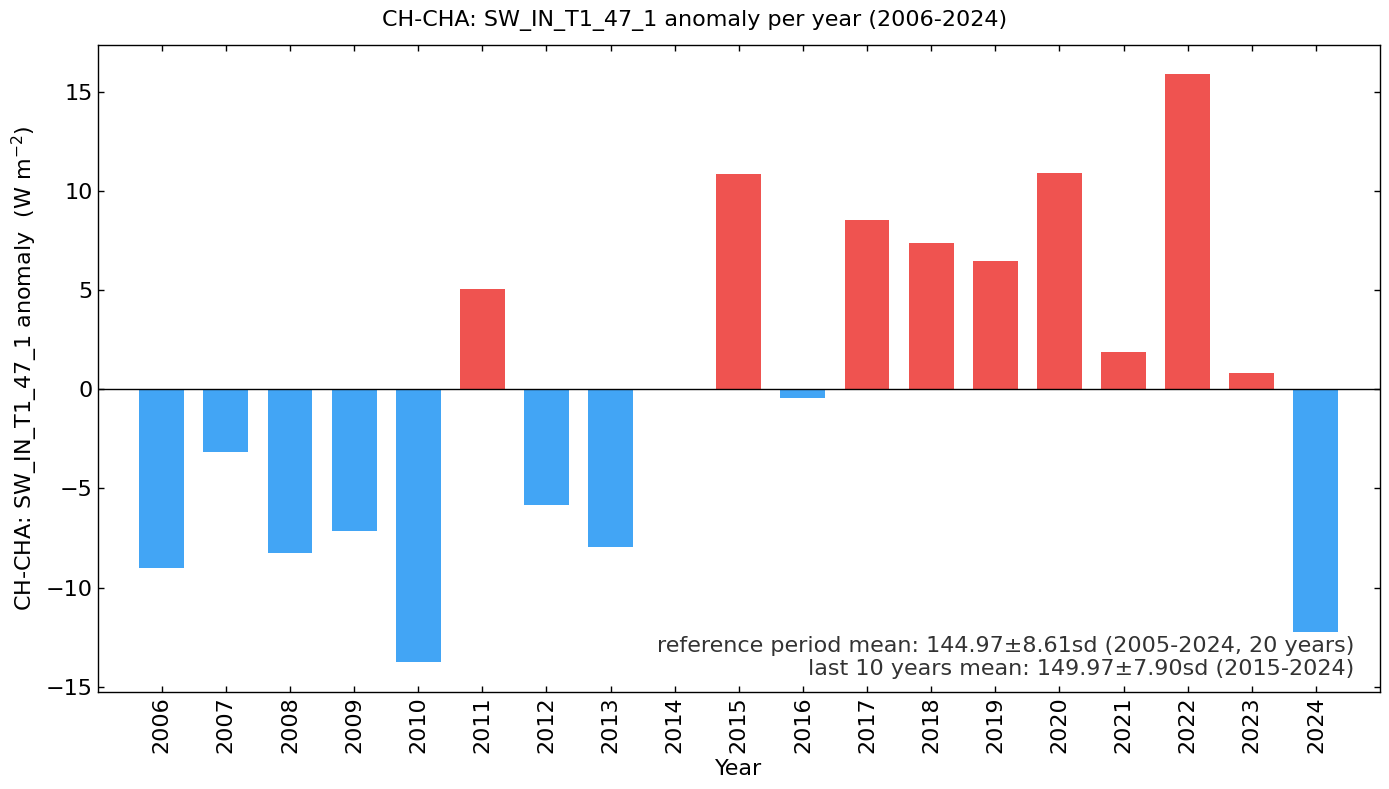

In [14]:
series_yearly_mean = series.resample('YE').mean()
series_yearly_mean.index = series_yearly_mean.index.year
series_label = f"CH-CHA: {varname}"
LongtermAnomaliesYear(series=series_yearly_mean,
                      series_label=series_label,
                      series_units=units,
                      reference_start_year=2005,
                      reference_end_year=2024).plot()

</br>

# End of notebook

In [15]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2025-06-11 22:13:59
